In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report # Import metrics

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

In [36]:
df = pd.read_csv(("/content/student_feedback.csv"), index_col=0)

**Cleaning the data**

In [37]:
rating_columns = [
    'Well versed with the subject', 'Explains concepts in an understandable way',
    'Use of presentations', 'Degree of difficulty of assignments',
    'Solves doubts willingly', 'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

for col in rating_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=rating_columns)

In [38]:
def generate_synthetic_comment(row):
    recommendation = row['Course recommendation based on relevance']
    if recommendation >= 8:
        return "The event was fantastic! Really engaging and well-structured."
    elif recommendation >= 4:
        return "The event was decent, but could use more interactive sessions."
    else:
        return "Disappointed with the event, lacked clarity and support."

df['Feedback Comment'] = df.apply(generate_synthetic_comment, axis=1)

**NLP sentiment analysis**

In [39]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Feedback Comment'].apply(get_sentiment)

def map_sentiment_ground_truth(rating):
    if rating >= 8:
        return 'Positive'
    elif rating >= 4:
        return 'Neutral'
    else:
        return 'Negative'

df['Ground_Truth_Sentiment'] = df['Course recommendation based on relevance'].apply(map_sentiment_ground_truth)

**Average ratings**

In [47]:
averages = df[rating_columns].mean().sort_values()


**Plots**

/tmp/ipython-input-42-4170991351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=averages.values, y=averages.index, palette='Blues_d')


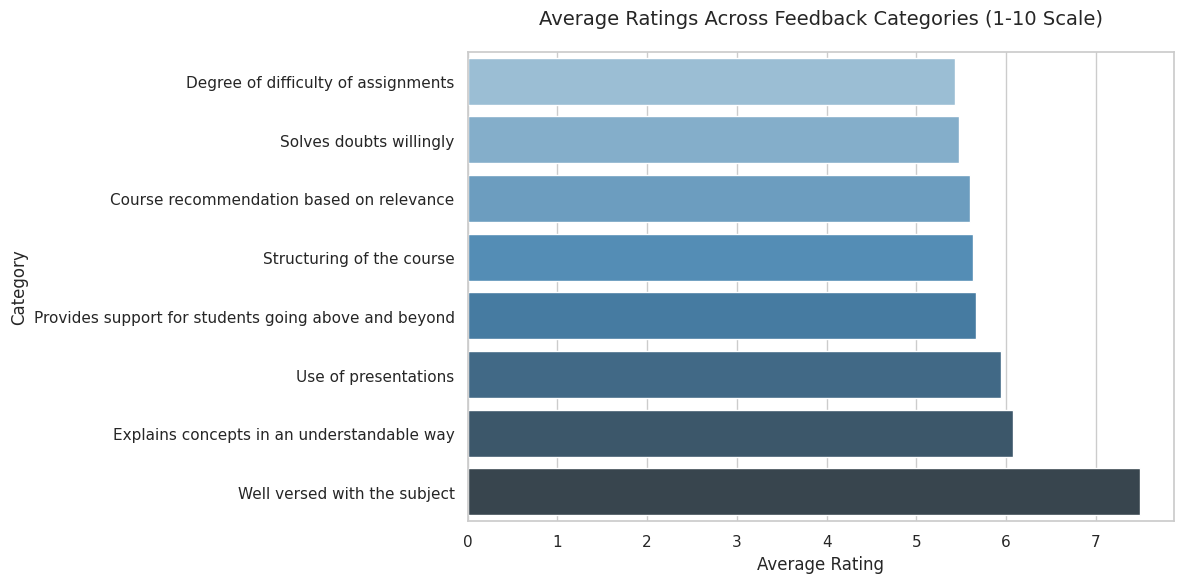

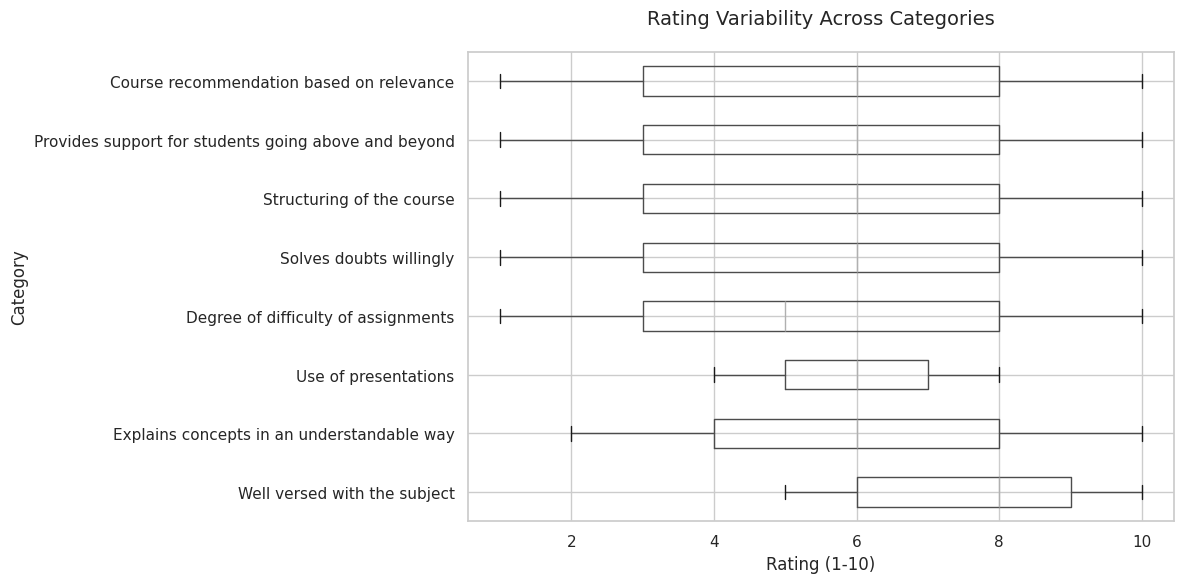

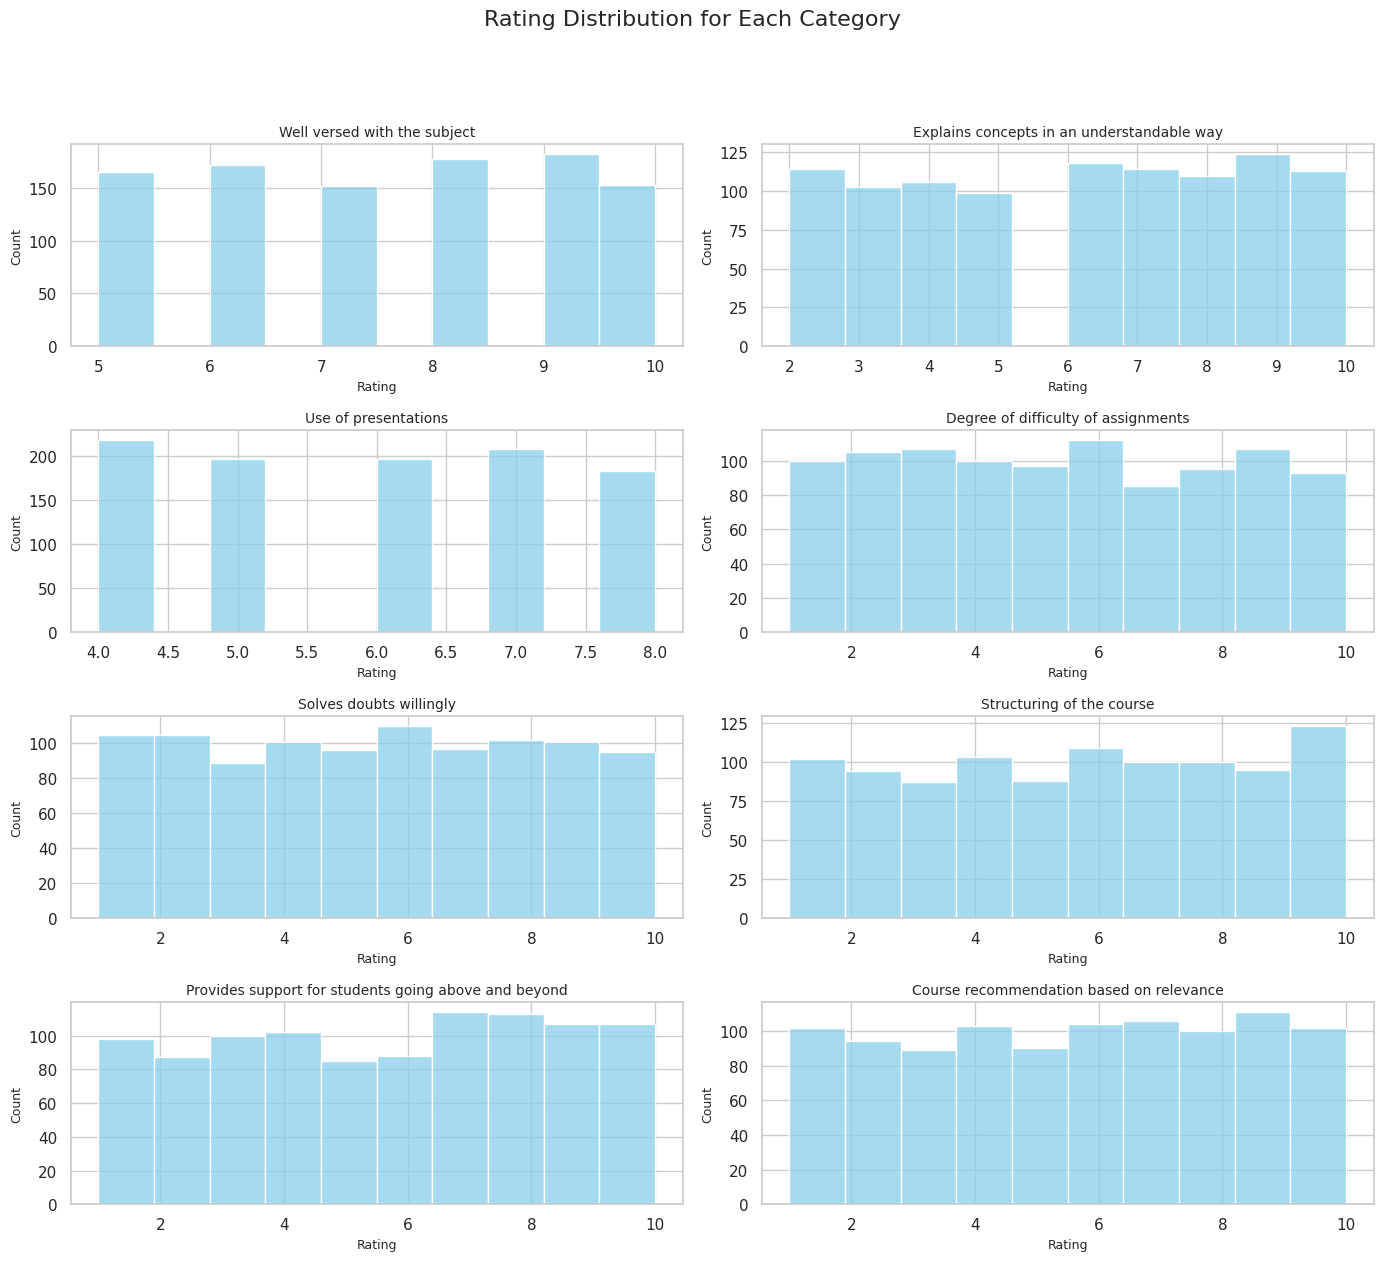

/tmp/ipython-input-42-4170991351.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


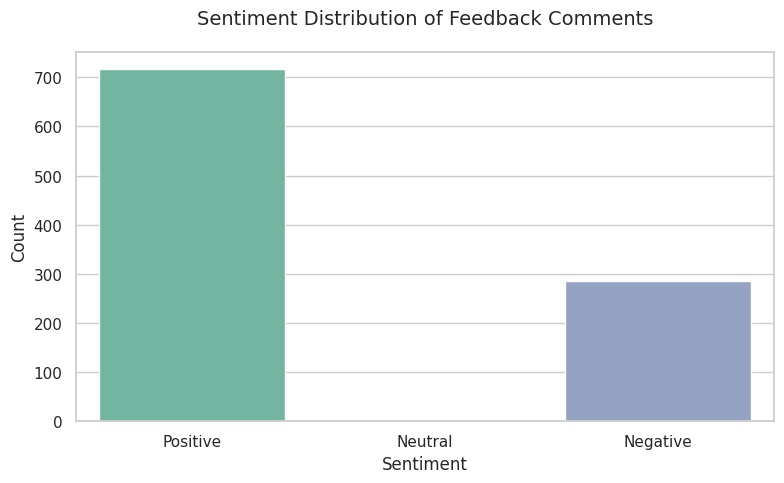

/tmp/ipython-input-42-4170991351.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Course recommendation based on relevance', data=df, palette='Set2')


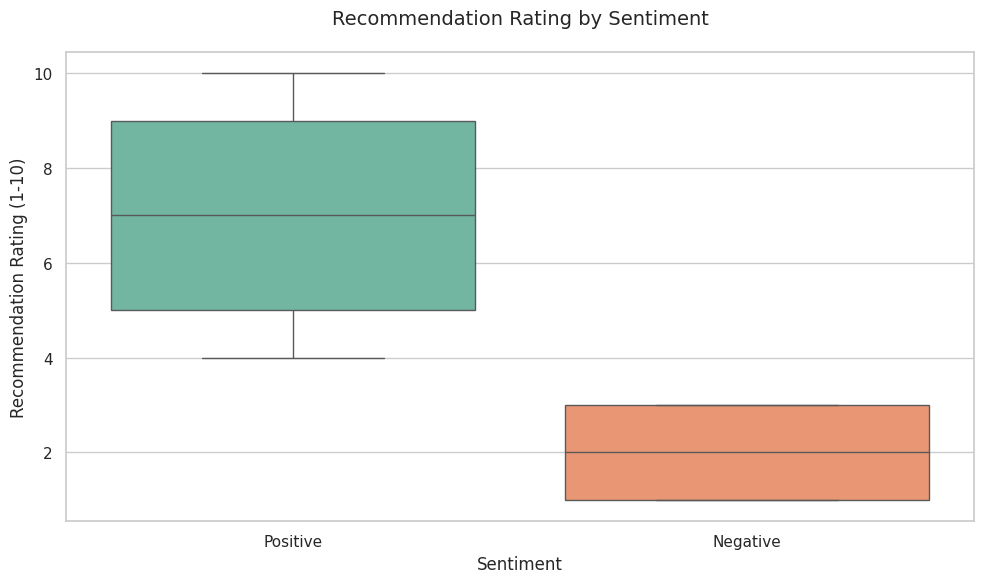

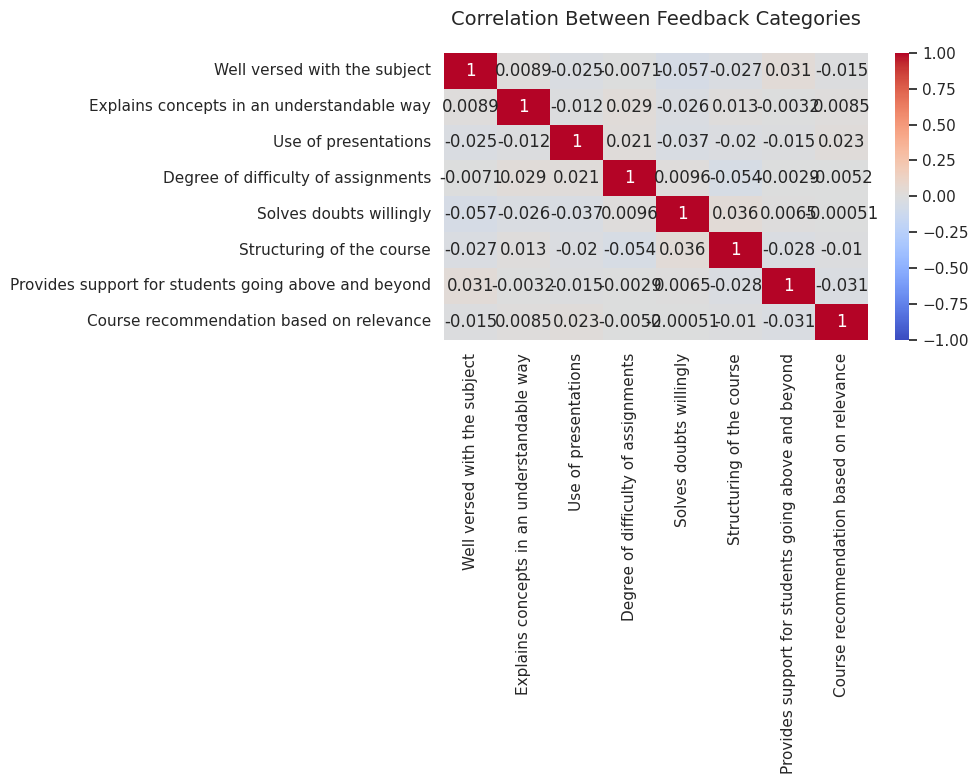

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=averages.values, y=averages.index, palette='Blues_d')
plt.title('Average Ratings Across Feedback Categories (1-10 Scale)', fontsize=14, pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.savefig('/content/average_ratings.png')
plt.show()

plt.figure(figsize=(12, 6))
df[rating_columns].boxplot(vert=False)
plt.title('Rating Variability Across Categories', fontsize=14, pad=20)
plt.xlabel('Rating (1-10)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.savefig('/content/rating_variability.png')
plt.show()

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
fig.suptitle('Rating Distribution for Each Category', fontsize=16, y=1.05)
axes = axes.flatten()
for i, col in enumerate(rating_columns):
    sns.histplot(df[col], bins=10, kde=False, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Rating', fontsize=9)
    axes[i].set_ylabel('Count', fontsize=9)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of Feedback Comments', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('/content/sentiment_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Course recommendation based on relevance', data=df, palette='Set2')
plt.title('Recommendation Rating by Sentiment', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Recommendation Rating (1-10)', fontsize=12)
plt.tight_layout()
plt.savefig('/content/sentiment_vs_recommendation.png')
plt.show()

correlation_matrix = df[rating_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Feedback Categories', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('/content/correlation_heatmap.png')
plt.show()


**Standard deviation**

In [43]:
difficulty_std = df['Degree of difficulty of assignments'].std()

**Analysis summary**

In [44]:
print("\n=== Feedback Analysis Summary ===")
print("Average Ratings:")
for category, avg in averages.items():
    print(f"{category}: {avg:.2f}")
print(f"\nStandard Deviation of Assignment Difficulty: {difficulty_std:.2f}")
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())
print("\nKey Insights:")
print("- Lowest average rating in 'Provides support for students going above and beyond' indicates a gap in supporting advanced students.")
print("- Highest average rating in 'Explains concepts in an understandable way' shows strength in teaching clarity.")
print("- Box plot reveals high variability in 'Degree of difficulty of assignments', suggesting inconsistent perceptions.")
print("- Sentiment analysis (on synthetic comments) aligns with recommendation ratings, with positive sentiments for higher ratings.")
print("- Correlation heatmap shows moderate relationships, e.g., course structure and recommendation may be linked.")
print("\nRecommendations:")
print("- Introduce advanced workshops or mentorship for students seeking extra challenges.")
print("- Maintain high-quality explanations and effective use of presentations.")
print(f"- Standardize assignment difficulty to reduce variability (std dev = {difficulty_std:.2f}).")
print("- Collect detailed text feedback in future surveys for more accurate sentiment analysis.")
print("- Focus on improving course structure, as it correlates with overall recommendation.")


=== Feedback Analysis Summary ===
Average Ratings:
Degree of difficulty of assignments: 5.43
Solves doubts willingly: 5.47
Course recommendation based on relevance: 5.60
Structuring of the course: 5.64
Provides support for students going above and beyond: 5.66
Use of presentations: 5.94
Explains concepts in an understandable way: 6.08
Well versed with the subject: 7.50

Standard Deviation of Assignment Difficulty: 2.87

Sentiment Distribution:
Sentiment
Positive    716
Negative    285
Name: count, dtype: int64

Key Insights:
- Lowest average rating in 'Provides support for students going above and beyond' indicates a gap in supporting advanced students.
- Highest average rating in 'Explains concepts in an understandable way' shows strength in teaching clarity.
- Box plot reveals high variability in 'Degree of difficulty of assignments', suggesting inconsistent perceptions.
- Sentiment analysis (on synthetic comments) aligns with recommendation ratings, with positive sentiments for hig

**Accuracy**

In [45]:
accuracy = accuracy_score(df['Ground_Truth_Sentiment'], df['Sentiment'])
print(f"\nAccuracy of Simulated Sentiment vs. Ground Truth: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(df['Ground_Truth_Sentiment'], df['Sentiment']))


Accuracy of Simulated Sentiment vs. Ground Truth: 59.74%

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       285
     Neutral       0.00      0.00      0.00       403
    Positive       0.44      1.00      0.61       313

    accuracy                           0.60      1001
   macro avg       0.48      0.67      0.54      1001
weighted avg       0.42      0.60      0.47      1001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
